## Imports

In [3]:
import numpy as np

from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
# Declare variables
NEEDLE = 'needle.png'
GAUGE = 'gauge.gif'

### Image Manipulation

#### Gauge Needle

*Modify the image to set the needle at 0 degrees*

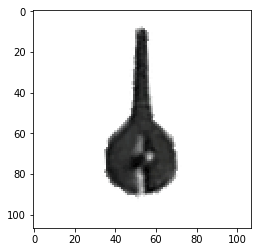

In [5]:
image = Image.open(NEEDLE).convert('RGBA')
image_rot_90 = image.rotate(318, expand=True, resample=Image.BICUBIC)
image_rot_90.save('needle_rot_0.png')
plt.imshow(image_rot_90)

In [6]:
def make_needles(angle):
    img = Image.open('needle_rot_0.png')
    x = img.rotate(-angle, expand=True, resample=Image.BICUBIC)
    # crop the rotated image to the size of the original image
    x = x.crop(box=(x.size[0]/2 - img.size[0]/2,
               x.size[1]/2 - img.size[1]/2,
               x.size[0]/2 + img.size[0]/2,
               x.size[1]/2 + img.size[1]/2))
    
    filename = "./needles/needle_rot_{0}.png".format(angle)
    
#     img_w,img_h=x.size
#     background = Image.new('RGBA', (150,150), (255, 255, 255, 0))
#     bg_w,bg_h=background.size
#     offset=((bg_w-img_w)/2,(bg_h-img_h)/2)
#     background.paste(x,offset)
#     plt.imshow(background)
#     background.save(filename)

    x.save(filename)

for angle in range(0, 365):
    make_needles(angle)

### Pasting an Image onto Another Image

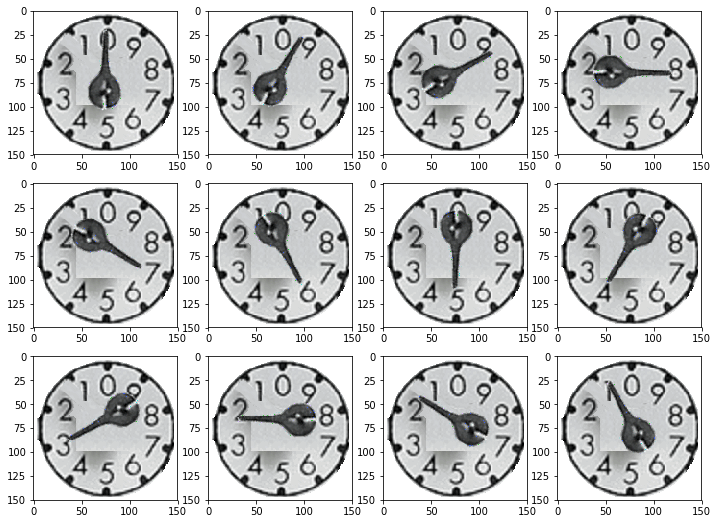

In [7]:
plt.rcParams["figure.figsize"] =(12,9)
img_gauge = Image.open(GAUGE, 'r')

r = range(1, 360, 30)

for index, item in enumerate(r):
    plt.subplot(3, 4, index+1)
    filename = "./needles/needle_rot_{0}.png".format(item)

    img_needle = Image.open(filename, 'r')

    img_copy = img_gauge.copy()

    # calculate the center of the gauge 
    x_coord = (img_gauge.width/2) - (img_needle.width/2)
    y_coord = (img_gauge.height/2) - (img_needle.height/2)-10

    # uses a coordinate system that starts with (0, 0) in the upper left corner.
    position = (x_coord, y_coord)

    img_copy.paste(img_needle.convert('L'), position, img_needle.convert('RGBA'))

    plt.imshow(img_copy)

In [8]:
#finds the straight-line distance between two points
def distance(ax, ay, bx, by):
    return math.sqrt((by - ay)**2 + (bx - ax)**2)

#rotates point `A` about point `B` by `angle` radians clockwise.
def rotated_about(ax, ay, bx, by, angle):
    radius = distance(ax,ay,bx,by)
    angle += math.atan2(ay-by, ax-bx)
    return (
        round(bx + radius * math.cos(angle)),
        round(by + radius * math.sin(angle))
    )

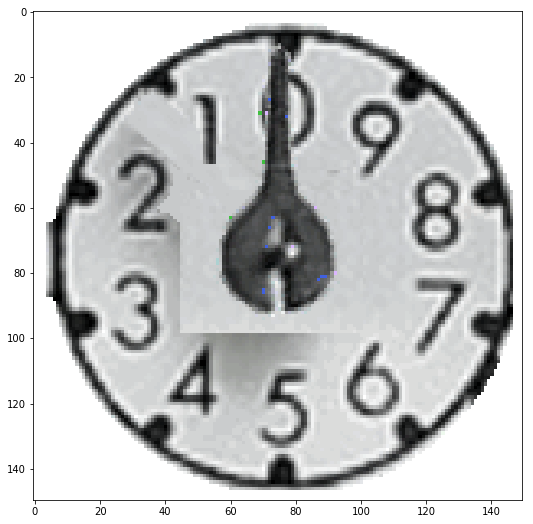

In [9]:
import math
from PIL import Image, ImageDraw

img_gauge = Image.open(GAUGE, 'r')

for angle in range(0, 361):
    filename = "./needles/needle_rot_{0}.png".format(angle)

    img_needle = Image.open(filename, 'r')
    img_copy = img_gauge.copy()
    
    
#     draw_needle = ImageDraw.Draw(img_needle)
#     draw_needle.rectangle([x0, y0, x1, y1],'red')
#     x0 = img_needle.width/2
#     y0 = img_needle.height/2
#     x1 = x0 + 10
#     y1 = y0 + 10
    
#     draw_needle.rectangle([x0, y0, x1, y1])
    
    
    draw = ImageDraw.Draw(img_copy)
    square_center = (75,75)
    square_length = 40

    square_vertices = (
        (square_center[0] + square_length / 2, square_center[1] + square_length / 2),
        (square_center[0] + square_length / 2, square_center[1] - square_length / 2),
        (square_center[0] - square_length / 2, square_center[1] - square_length / 2),
        (square_center[0] - square_length / 2, square_center[1] + square_length / 2)
    )

    square_vertices = [rotated_about(x,y, square_center[0], square_center[1], math.radians(angle)) for x,y in square_vertices]

#     draw.polygon(square_vertices, fill=255)
    
    # calculate the center of the gauge 
    x_coord = (img_gauge.width/2) - (img_needle.width/2) 
    y_coord = (img_gauge.height/2) - (img_needle.height/2)
    
#     if( (angle > 0) and (angle < 45)):
#         y_coord -= 15
#         x_coord += 15

#     if( (angle > 45) and (angle < 90)):
#         y_coord -= 10
#         x_coord += 15
    
    #
    # Define offsets for know angles
    #
    if(angle == 0 or angle == 360):
        y_coord -= 20
        
    if(angle == 90):
        x_coord += 20

    if(angle == 180):
        y_coord += 20

    if(angle == 270):
        x_coord -= 20

    
    # Between 270 - 360, 0 - 90
    
#     print(img_needle.width)
    # uses a coordinate system that starts with (0, 0) in the upper left corner.
    position = (x_coord, y_coord)
    
#     print(position)
    img_copy.paste(img_needle.convert('L'), position, img_needle.convert('RGBA'))
    
    plt.imshow(img_copy)
    filename_save = "./gauges/gauge_rot_{0}.png".format(angle)
    img_copy.save(filename_save)

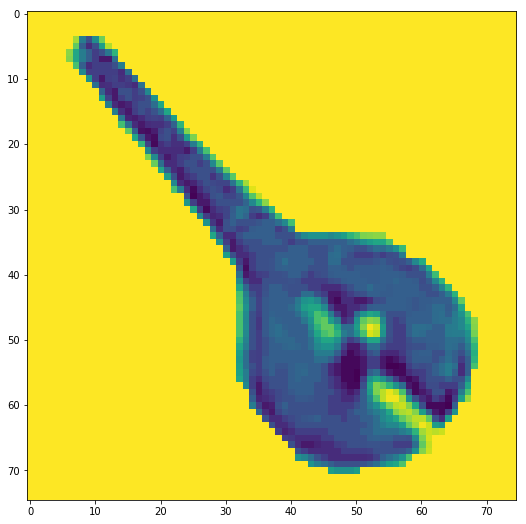

In [10]:
needle_im = Image.open(NEEDLE, 'r')
plt.imshow(np.asarray(needle_im))

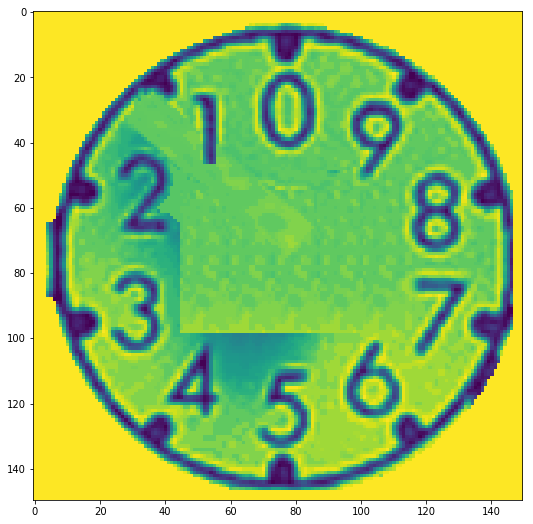

In [11]:
gauge_im = Image.open('gauge.gif', 'r')
plt.imshow(np.asarray(gauge_im))

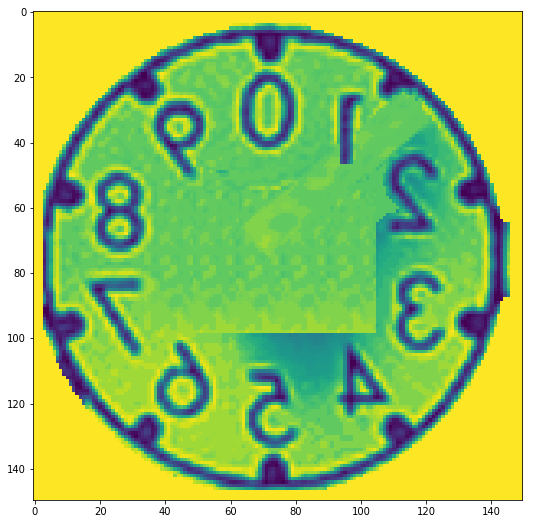

In [12]:
image = Image.open(GAUGE)
image_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(np.asarray(image_flip))